/home/cecilio/.conda/envs/phenomxpy/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/cecilio/.conda/envs/phenomxpy/lib/python3.10/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


1.0607769620178682e-16


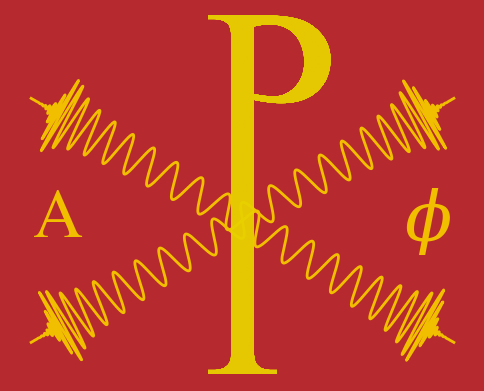

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

kwargs = {
    "eta": 0.25,
    "s1": [0.8, -0.1, 0.0],
    "s2": [0.8, 0.4, -0.0],
    "f_min": 0.01,
    "f_ref": 0.01,
    # "total_mass": 100,
    "delta_t": 1,
    "inclination": 1.4,
    "phiRef": 0.5,
    "distance": 2000,
    "prec_version": "nnlo",
    "store_arrays": True,
    # "quaternions_from": "frame"
    # "v_function": "imr_omega",
    # "numba_derivatives": False,
    # "numba_spline_for": "euler_angles",
    # "quaternions_from": "euler_angles",
    # "gamma_integration_method": "boole",
    "condition": False,
}

from phenomxpy import IMRPhenomT
import numpy as np
from phenomxpy.utils import MasstoSecond

phen = IMRPhenomT(**kwargs)
hp, hc, times = phen.compute_polarizations()

strain = hp - 1j * hc

strain *= np.exp(-1j * np.angle(strain[0]))

print(np.angle(strain[0]))

hp = -np.imag(strain)

# Assume waveform is a 1D numpy array
# Example dummy waveform (chirp-like) if you don't have one yet:
# t = np.linspace(0, 1, 1000)
# waveform = np.sin(50 * np.pi * t**2) * t  # monotonic in freq and amp
waveform = hp[(times <= 100)]
waveform_shifted = waveform  # [::-1]

waveform_shifted = np.pad(waveform_shifted, (len(waveform_shifted), 0))


# Coordinates of the waveform centered at origin
x = np.linspace(0, 1, len(waveform_shifted))  # time axis
x = x - x[-1] / 2  # center at 0
y = 2 * waveform_shifted

# Build the X-shape by rotating the waveform
# angles = [30, 150, -150, -30]
angles = [30, 150, -150, -30]
waveforms = []

for angle in angles:
    theta = np.deg2rad(angle)
    x_rot = x * np.cos(theta) - y * np.sin(theta)
    y_rot = x * np.sin(theta) + y * np.cos(theta)
    x_rot = x_rot[-len(x_rot) // 2 :]
    y_rot = y_rot[-len(y_rot) // 2 :]
    waveforms.append((x_rot, y_rot))

# Load an image
img = mpimg.imread("/home/cecilio/Pictures/rhogold_long_color.png")
# Replace with your image path

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
for xw, yw in waveforms:
    ax.plot(xw, yw, color="#F1BF00", lw=2)

# Get current limits
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()

# Center the image in the plot
imagebox = OffsetImage(img, zoom=0.15, alpha=0.95)
# ab = AnnotationBbox(imagebox, (0.06, 0.), frameon=False)
ab = AnnotationBbox(imagebox, (0.055, y0), frameon=False, xycoords="data", box_alignment=(0.5, 0))
ax.add_artist(ab)

ax.text(0.05, 0.5, "A", fontsize=50, color="#F1BF00", ha="left", va="center", fontfamily="stix", transform=ax.transAxes)  # Try others from the list
plt.rcParams["mathtext.fontset"] = "dejavuserif"
ax.text(
    0.95,
    0.5,
    "$\phi$",
    fontsize=50,
    color="#F1BF00",
    ha="right",
    va="center",
    # fontfamily='stixsans',  # Try others from the list
    transform=ax.transAxes,
)

# Styling
ax.set_aspect("equal")
ax.axis("off")
fig.patch.set_facecolor("#b6292e")

# plt.tight_layout()
plt.show()

# from PIL import Image
fig.savefig("./source/_static/img/logo.svg", transparent=True, bbox_inches="tight", pad_inches=0)
fig.savefig("./source/_static/img/logo.png", transparent=False, bbox_inches="tight", pad_inches=0)

# # Generate a matplotlib image
fig.savefig("temp_logo.png", transparent=False, bbox_inches="tight", pad_inches=0)
plt.close(fig)

# Convert to ICO
img = Image.open("temp_logo.png").resize((64, 64))
img.save("./source/_static/img/favicon.ico", format="ICO")

1.0607769620178682e-16


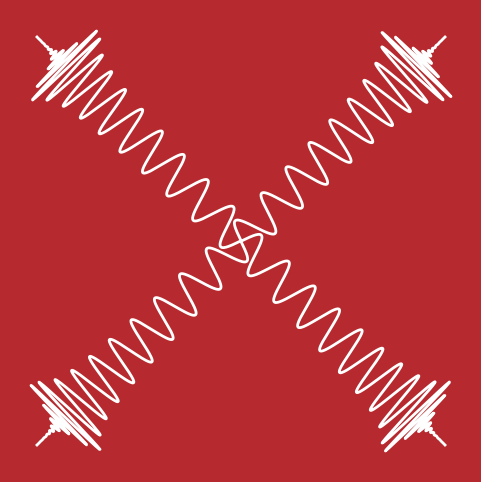

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

kwargs = {
    "eta": 0.25,
    "s1": [0.8, -0.1, 0.0],
    "s2": [0.8, 0.4, -0.0],
    "f_min": 0.01,
    "f_ref": 0.01,
    # "total_mass": 100,
    "delta_t": 1,
    "inclination": 1.4,
    "phiRef": 0.5,
    "distance": 2000,
    "prec_version": "nnlo",
    "store_arrays": True,
    # "quaternions_from": "frame"
    # "v_function": "imr_omega",
    # "numba_derivatives": False,
    # "numba_spline_for": "euler_angles",
    # "quaternions_from": "euler_angles",
    # "gamma_integration_method": "boole",
    "condition": False,
}

from phenomxpy import IMRPhenomT
import numpy as np
from phenomxpy.utils import MasstoSecond

phen = IMRPhenomT(**kwargs)
hp, hc, times = phen.compute_polarizations()

strain = hp - 1j * hc

strain *= np.exp(-1j * np.angle(strain[0]))

print(np.angle(strain[0]))

hp = -np.imag(strain)

# Assume waveform is a 1D numpy array
# Example dummy waveform (chirp-like) if you don't have one yet:
# t = np.linspace(0, 1, 1000)
# waveform = np.sin(50 * np.pi * t**2) * t  # monotonic in freq and amp
waveform = hp[(times <= 100)]
waveform_shifted = waveform  # [::-1]

waveform_shifted = np.pad(waveform_shifted, (len(waveform_shifted), 0))


# Coordinates of the waveform centered at origin
x = np.linspace(0, 1, len(waveform_shifted))  # time axis
x = x - x[-1] / 2  # center at 0
y = 2 * waveform_shifted

# Build the X-shape by rotating the waveform
angles = [45, 135, -135, -45]
# angles = [30, 150, -150, -30]
waveforms = []

for angle in angles:
    theta = np.deg2rad(angle)
    x_rot = x * np.cos(theta) - y * np.sin(theta)
    y_rot = x * np.sin(theta) + y * np.cos(theta)
    x_rot = x_rot[-len(x_rot) // 2 :]
    y_rot = y_rot[-len(y_rot) // 2 :]
    waveforms.append((x_rot, y_rot))

# Load an image
img = mpimg.imread("/home/cecilio/Pictures/rhogold_long_color.png")
# Replace with your image path

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
for xw, yw in waveforms:
    # ax.plot(xw, yw, color="#F1BF00", lw=2)
    ax.plot(xw, yw, color="white", lw=2)

# Get current limits
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()

# # Center the image in the plot
# imagebox = OffsetImage(img, zoom=0.15, alpha=0.95)
# #ab = AnnotationBbox(imagebox, (0.06, 0.), frameon=False)
# ab = AnnotationBbox(imagebox, (0.055, y0), frameon=False, xycoords='data', box_alignment=(0.5, 0))
# ax.add_artist(ab);

# ax.text(0.05, 0.5, 'A',
#         fontsize=50,
#         color='#F1BF00',
#         ha='left',
#         va='center',
#         fontfamily='stix',  # Try others from the list
#         transform=ax.transAxes)
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'
# ax.text(0.95, 0.5, '$\phi$',
#         fontsize=50,
#         color='#F1BF00',
#         ha='right',
#         va='center',
#         #fontfamily='stixsans',  # Try others from the list
#         transform=ax.transAxes)

# Styling
ax.set_aspect("equal")
ax.axis("off")
fig.patch.set_facecolor("#b6292e")

# plt.tight_layout()
plt.show()

# from PIL import Image
fig.savefig("./source/_static/img/logo.svg", transparent=True, bbox_inches="tight", pad_inches=0)
fig.savefig("./source/_static/img/logo.png", transparent=True, bbox_inches="tight", pad_inches=0)

# # Generate a matplotlib image
fig.savefig("temp_logo.png", transparent=False, bbox_inches="tight", pad_inches=0)
plt.close(fig)

# Convert to ICO
img = Image.open("temp_logo.png").resize((64, 64))
img.save("./source/_static/img/favicon.ico", format="ICO")